In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppresses INFO and WARNING logs from TensorFlow

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [15]:
import os
import cv2
import numpy as np

X_train = [] 
Y_train = [] 
image_size = 224
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Load training data
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))  # fixed imread
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(i)

# Load testing data
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))  # fixed imread
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)




In [16]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle 
import tensorflow as tf

In [17]:
from sklearn.utils import shuffle

# Shuffle the dataset
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Check shape
print(X_train.shape)


(3264, 224, 224, 3)


In [18]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Optional: Check the shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (2937, 224, 224, 3)
Test set: (327, 224, 224, 3)


In [19]:
print(y_train[:5])


['glioma_tumor' 'meningioma_tumor' 'meningioma_tumor' 'glioma_tumor'
 'pituitary_tumor']


In [20]:


# Define your label list
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Convert string labels to numeric only if they are still strings
if isinstance(y_train[0], str):
    y_train = [labels.index(i) for i in y_train]
    y_test = [labels.index(i) for i in y_test]

# One-hot encode
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=len(labels))
Y_test = to_categorical(y_test, num_classes=len(labels))


In [21]:
model =Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0,3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Conv2D(120,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,3))
model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))




In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 120)    │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 120)    │       129,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       276,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,370,404 (16.67 MB)

 Trainable params: 4,370,404 (16.67 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load training and validation datasets (update 'your_dataset_path')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

# Define the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Found 2870 files belonging to 4 classes.
Found 2870 files belonging to 4 classes.
Epoch 1/20


I0000 00:00:1752247462.699290      99 service.cc:148] XLA service 0x7e5ddc007110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752247462.700229      99 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752247463.025034      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


13/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3439 - loss: 1.4303

I0000 00:00:1752247465.528563      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.5142 - loss: 1.1208 - val_accuracy: 0.7237 - val_loss: 0.6379
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7684 - loss: 0.5795 - val_accuracy: 0.8272 - val_loss: 0.4804
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8656 - loss: 0.3920 - val_accuracy: 0.8983 - val_loss: 0.2734
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9008 - loss: 0.2658 - val_accuracy: 0.9540 - val_loss: 0.1429
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9515 - loss: 0.1508 - val_accuracy: 0.9603 - val_loss: 0.1032
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9672 - loss: 0.0966 - val_accuracy: 0.9780 - val_loss: 0.0690
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9687 - loss: 0.0829 - val_accuracy: 0.9941 - val_loss: 0.0251
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9820 - loss: 0.0483 - val_accuracy: 0.9840 - val_loss: 0

In [25]:
print(type(X_train))
print(X_train[:5])  # or df.head() if it's a DataFrame


<class 'numpy.ndarray'>
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [

In [29]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',  # ✅ correct string
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-classification-mri/Training',
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)


Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Found 2870 files belonging to 4 classes.
Using 287 files for validation.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

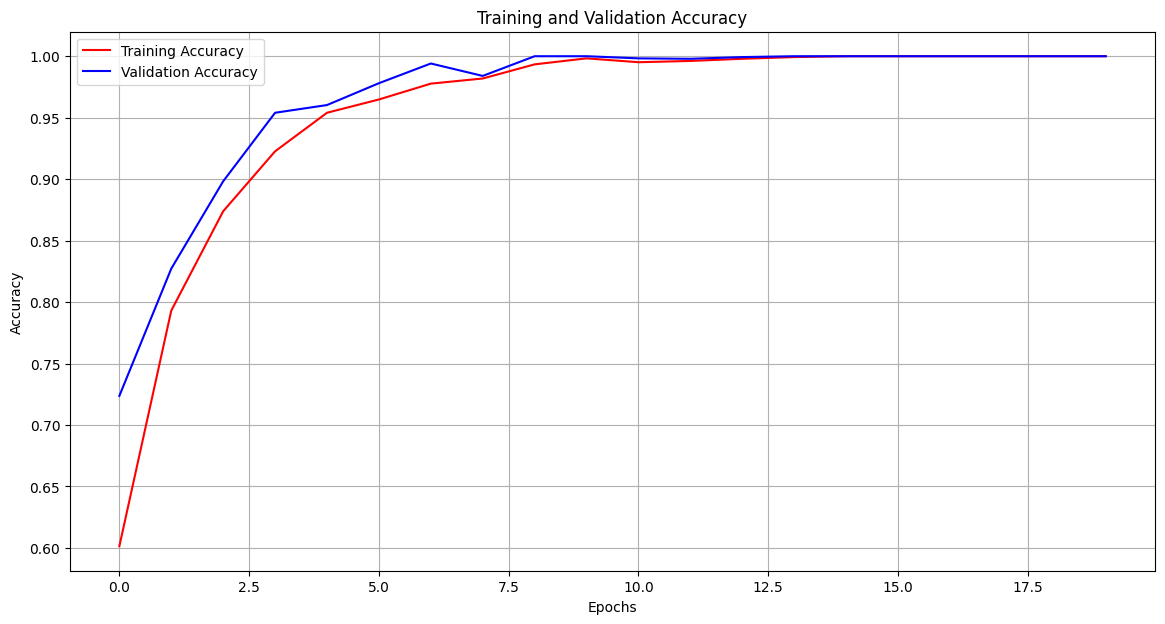

In [31]:
# Save the trained model
import matplotlib.pyplot as plt

# Plotting accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14, 7))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')  # Changed to 'b' for better distinction
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.4868 - loss: 1.1857 - val_accuracy: 0.7038 - val_loss: 0.7052
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7558 - loss: 0.5959 - val_accuracy: 0.8084 - val_loss: 0.4512
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8665 - loss: 0.3668 - val_accuracy: 0.8641 - val_loss: 0.3973
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9033 - loss: 0.2343 - val_accuracy: 0.8885 - val_loss: 0.3020
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9482 - loss: 0.1473 - val_accuracy: 0.8780 - val_loss: 0.3839
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9659 - loss: 0.1052 - val_accuracy: 0.8955 - val_loss: 0.3521
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9667 - loss: 0.0900 - val_accuracy: 0.9199 - val_loss: 0.3366
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9857 - loss: 0.0446 - val_accuracy: 0.9164 - val_loss: 0.

In [33]:
import matplotlib.pyplot

In [34]:
import cv2
import numpy as np

img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (101).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
print(img_array.shape)


(150, 150, 3)


In [35]:
img_array =img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

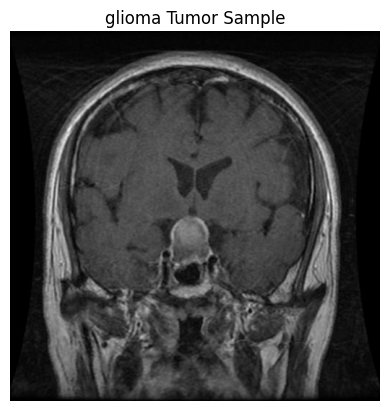

In [37]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (101).jpg')


# Display it
plt.imshow(img)
plt.axis('off')  # Optional: hides the axis
plt.title("glioma Tumor Sample")
plt.show()


In [51]:
import os
print("Current files in /kaggle/working/:")
print(os.listdir('/kaggle/working/'))


Current files in /kaggle/working/:
['.virtual_documents']


In [39]:
model = load_model('braintumor.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'braintumor.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained model
model = load_model('braintumor.h5')

# Step 1: Load and resize image to match model input
img_path = '/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (101).jpg'
img = image.load_img(img_path, target_size=(128, 128))

# Step 2: Convert image to array and normalize
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Step 3: Predict
print("Model input shape:", model.input_shape)
print("Image input shape:", img_array.shape)

a = model.predict(img_array)
indices = a.argmax()

# Step 4: Print class
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
print("Predicted class:", labels[indices])



FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'braintumor.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [40]:
print(model.input_shape)


(None, 128, 128, 3)


In [41]:
from tensorflow.keras.models import load_model

try:
    model = load_model('braintumor.h5')
    print("File is a valid H5 Keras model.")
except Exception as e:
    print("Error loading model:", e)


Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = 'braintumor.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [48]:
model.add(Dense(4, activation='softmax'))


In [46]:
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final validation accuracy:", history.history['val_accuracy'][-1])


Final training accuracy: 1.0
Final validation accuracy: 0.9268292784690857


In [44]:
for i, prob in enumerate(a[0]):
    print(f"{labels[i]}: {prob:.4f}")


NameError: name 'a' is not defined

In [43]:
import os
from collections import Counter

train_dir = "/kaggle/input/brain-tumor-classification-mri/Training"
classes = os.listdir(train_dir)
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}
print(class_counts)


{'no_tumor': 395, 'pituitary_tumor': 827, 'meningioma_tumor': 822, 'glioma_tumor': 826}


In [49]:
print("Raw prediction:", a)
print("Predicted index:", indices)
print("Predicted class:", labels[indices])


NameError: name 'a' is not defined

In [ ]:
print(np.unique(y_train, return_counts=True))


In [ ]:
for i, score in enumerate(a[0]):
    print(f"{labels[i]}: {score:.4f}")


NameError: name 'indices' is not defined

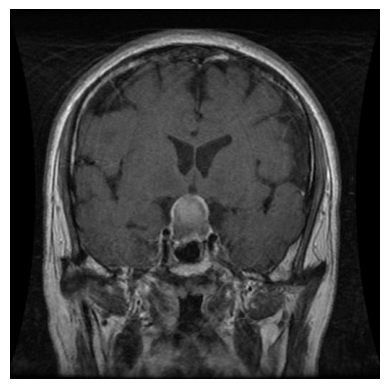

In [50]:
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {labels[indices]}")
plt.show()


In [ ]:
print("Raw model output:", a)
